# Marketing Assignment 6
Anusha Bhat, Mahima Masetty, Bruna Medeiros, Aarav Dewangan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import (mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score)
from sklearn.metrics import accuracy_score, recall_score
from xgboost import XGBRegressor, XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_excel("DIGITAL Retail Digital Media Data.xlsx")
df = pd.read_excel('/content/drive/Shareddrives/DS for Marketing/Assignment 6/DIGITAL Retail Digital Media Data.xlsx')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Campaign_Name,Content_Category,Creative_Product,Creative,Creative_Size,Website / Network Name,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold
0,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,300x250,Amazon Media Network,2169,988,6.765564,0
1,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Save Money Blue Logo,300x250,Amazon Media Network,1345,988,6.391223,0
2,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Better Than Average,300x250,Amazon Media Network,2253,1087,6.421077,0
3,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Better Than Average,300x250,Amazon Media Network,2281,1074,6.786280,0
4,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Best value Tab,300x250,Amazon Media Network,2193,1041,6.472956,0
...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-08-12,Targeted Conversion Campaign,Advertising Nets,Laptop,Best value Tab,728x90,Yahoo! Network,30189,1031,10.511680,0
19731,2016-08-12,Targeted Conversion Campaign,Advertising Nets,Laptop,Save Money Green Logo $,728x90,Yahoo! Network,15569,1049,8.155507,0
19732,2016-08-12,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,728x90,Yahoo! Network,30172,1117,10.741370,0
19733,2016-08-12,Targeted Conversion Campaign,Behavioral Targeting,Desktop,Better Products,728x90,Yahoo! Network,19780,1003,14.439026,0


# Exploratory Data Analysis

In [ ]:
df.head()

,Date,Campaign_Name,Content_Category,Creative_Product,Creative,Creative_Size,Website / Network Name,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold,Converted,CT
0,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Super Value,300x250,Amazon Media Network,2169,988,6.765564,0,0,0.455509
1,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Save Money Blue Logo,300x250,Amazon Media Network,1345,988,6.391223,0,0,0.734572
2,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Better Than Average,300x250,Amazon Media Network,2253,1087,6.421077,0,0,0.482468
3,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Laptop,Better Than Average,300x250,Amazon Media Network,2281,1074,6.786280,0,0,0.470846
4,2016-05-19,Targeted Conversion Campaign,Advertising Nets,Desktop,Best value Tab,300x250,Amazon Media Network,2193,1041,6.472956,0,0,0.474692


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Campaign_Name,object
Content_Category,object
Creative_Product,object
Creative,object
Creative_Size,object
Website / Network Name,object
Impressions_Delivered,int64
Clicks_Recorded,int64
Media_Cost,float64


In [ ]:
df.isna().sum()

,0
Date,0
Campaign_Name,0
Content_Category,0
Creative_Product,0
Creative,0
Creative_Size,0
Website / Network Name,0
Impressions_Delivered,0
Clicks_Recorded,0
Media_Cost,0


In [ ]:
df.shape

(19735, 13)

In [ ]:
df.describe()

,Date,Impressions_Delivered,Clicks_Recorded,Media_Cost,Units_sold,Converted,CT
count,19735,1.973500e+04,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-07-09 19:19:09.044844288,2.819604e+04,1049.688219,24.065301,0.070028,0.039118,0.287203
min,2016-05-19 00:00:00,1.095000e+03,944.000000,5.772713,0.000000,0.000000,0.000164
25%,2016-06-14 00:00:00,2.252000e+03,1017.000000,6.736431,0.000000,0.000000,0.069578
50%,2016-07-21 00:00:00,4.742000e+03,1045.000000,8.031764,0.000000,0.000000,0.220024
75%,2016-08-03 00:00:00,1.505300e+04,1073.000000,11.845009,0.000000,0.000000,0.461779
max,2016-08-12 00:00:00,3.285737e+07,18524.000000,11228.800147,15.000000,1.000000,0.996354
std,NaN,3.220238e+05,180.325591,253.838878,0.477168,0.193881,0.249728


There are no NA values in the data set. There are 19,735 observations and 11 columns (6 categorical, 4 numerical, 1 date)

In [ ]:
df['Units_sold'].value_counts()

,count
Units_sold,
0,18963
1,511
2,130
3,58
4,24
5,19
6,10
8,6
10,4


In [ ]:
(df['Units_sold'] != 0).sum() / len(df) * 100

3.9118317709652897

There is a substantially large amount of data points that have 0 units sold--encompassing approximately 96% of the data set. Since there is such a small amount of data points with a non-zero value for units sold, this dataset is imbalanced. We will have to keep this in mind when we construct our models for predicting units sold. One possible solution is either undersampling the majority class or oversampling the minority class.

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

print(correlation_matrix)

                       Impressions_Delivered  Clicks_Recorded  Media_Cost  \
Impressions_Delivered               1.000000         0.879776    0.736610   
Clicks_Recorded                     0.879776         1.000000    0.591984   
Media_Cost                          0.736610         0.591984    1.000000   
Units_sold                          0.455103         0.436836    0.509017   
Converted                           0.178319         0.142313    0.199355   
CT                                 -0.087650        -0.045776   -0.075357   

                       Units_sold  Converted        CT  
Impressions_Delivered    0.455103   0.178319 -0.087650  
Clicks_Recorded          0.436836   0.142313 -0.045776  
Media_Cost               0.509017   0.199355 -0.075357  
Units_sold               1.000000   0.727370 -0.125889  
Converted                0.727370   1.000000 -0.162912  
CT                      -0.125889  -0.162912  1.000000  


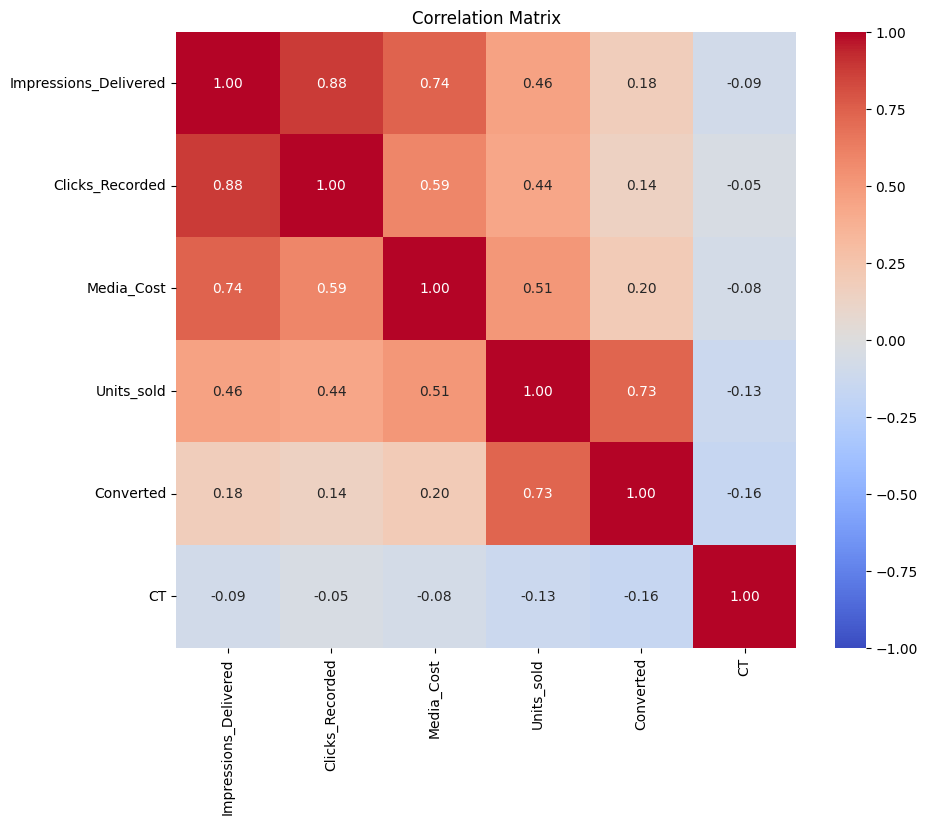

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Impressions delivered is positively correlated with clicks recorded and also with media cost. We should keep this in mind when constructing our models to avoid multicollinearity.

<Figure size 1000x800 with 0 Axes>

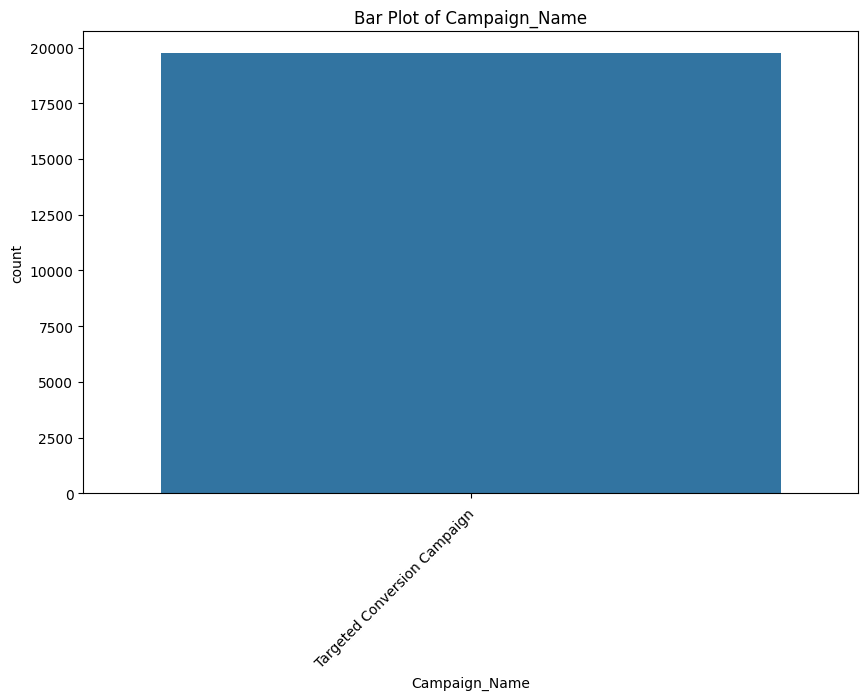

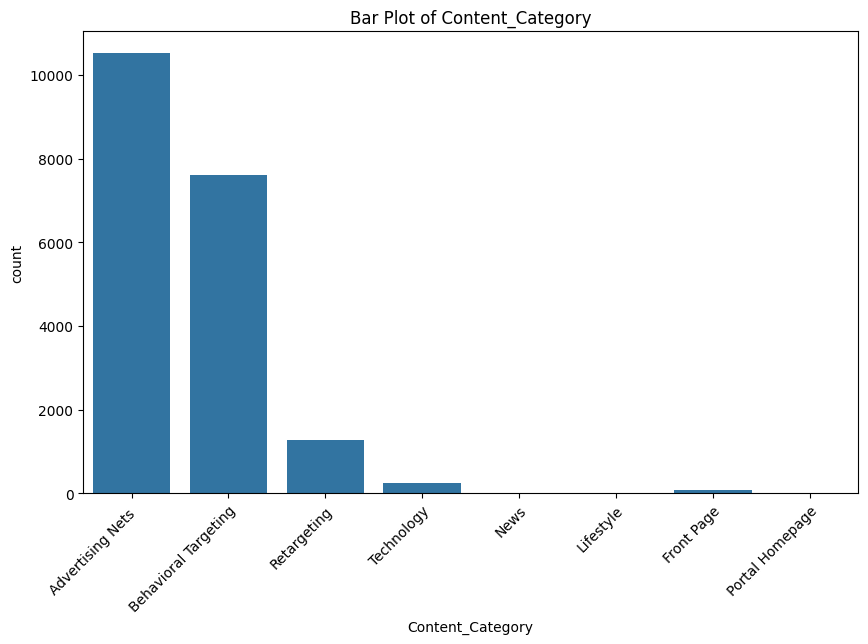

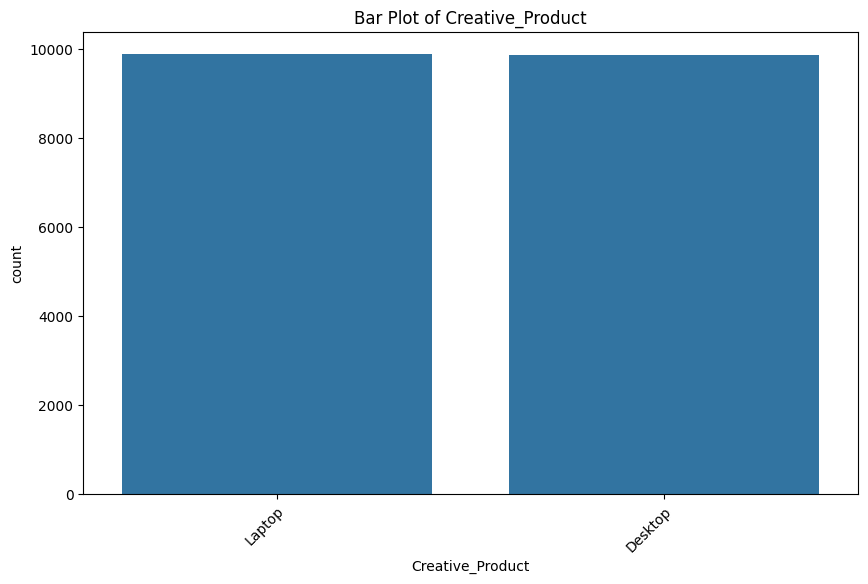

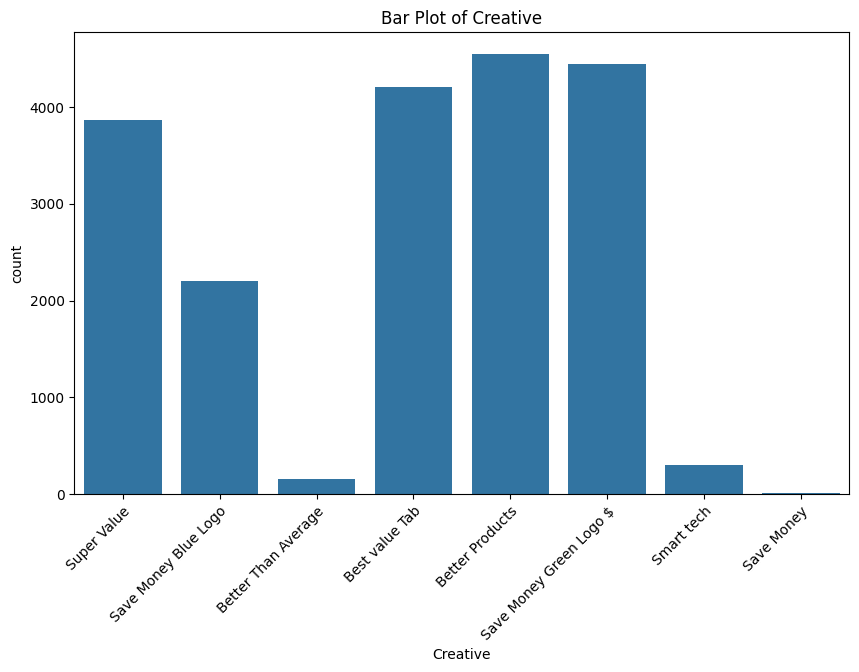

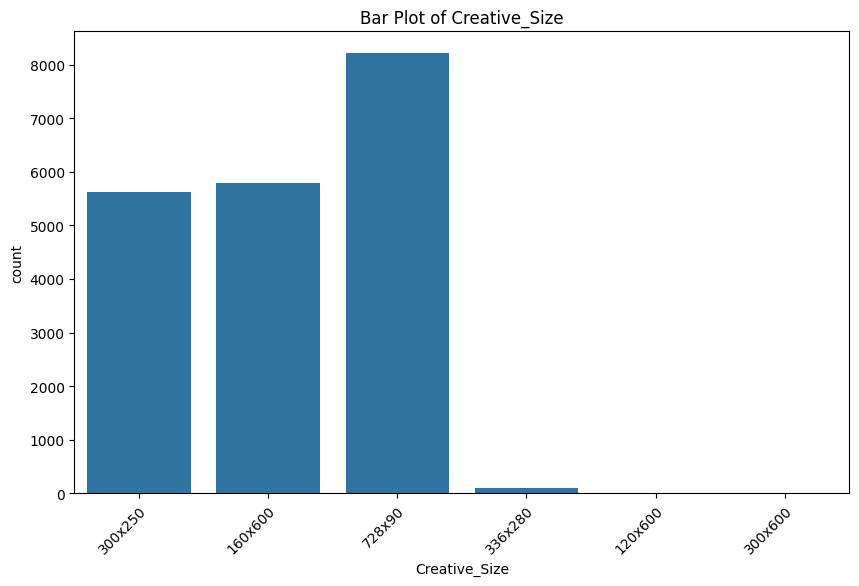

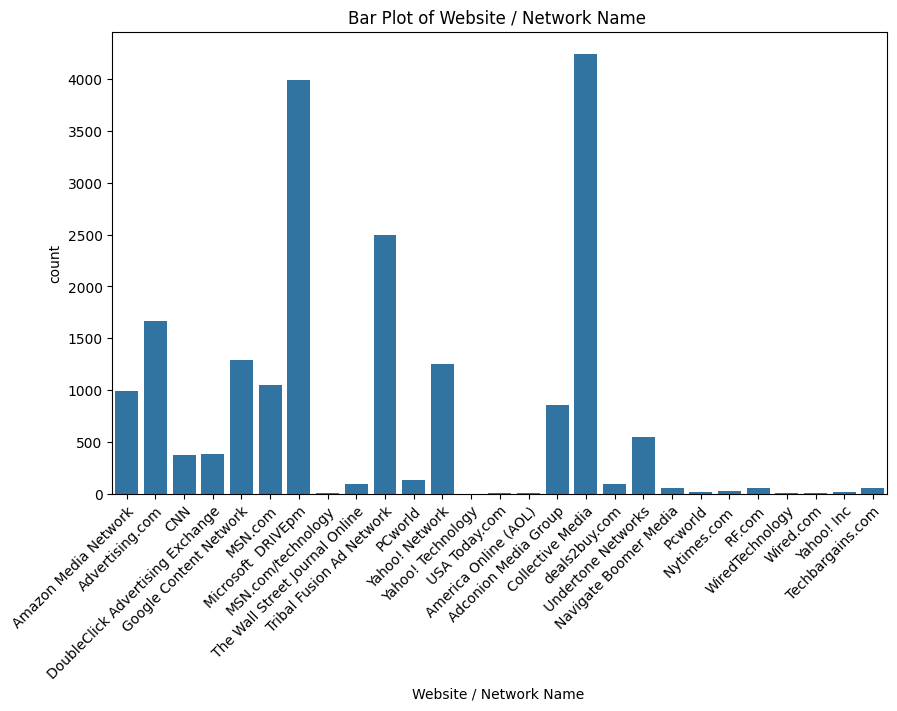

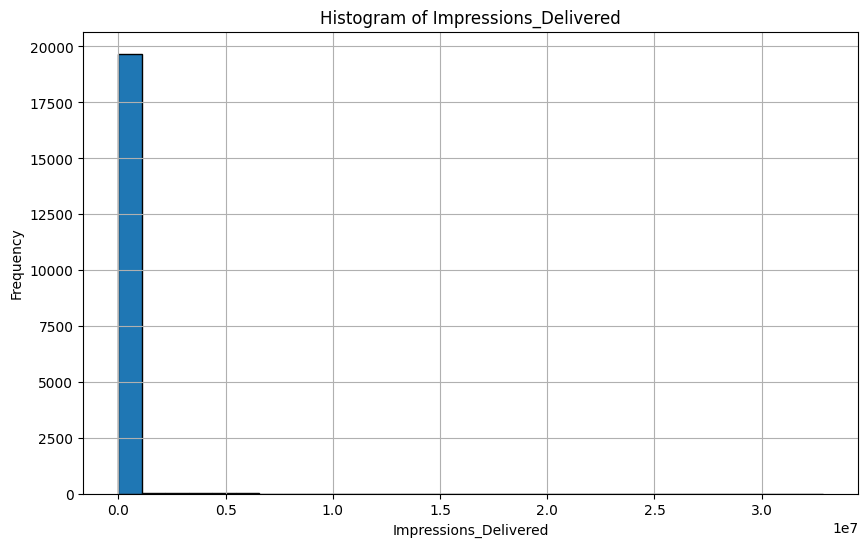

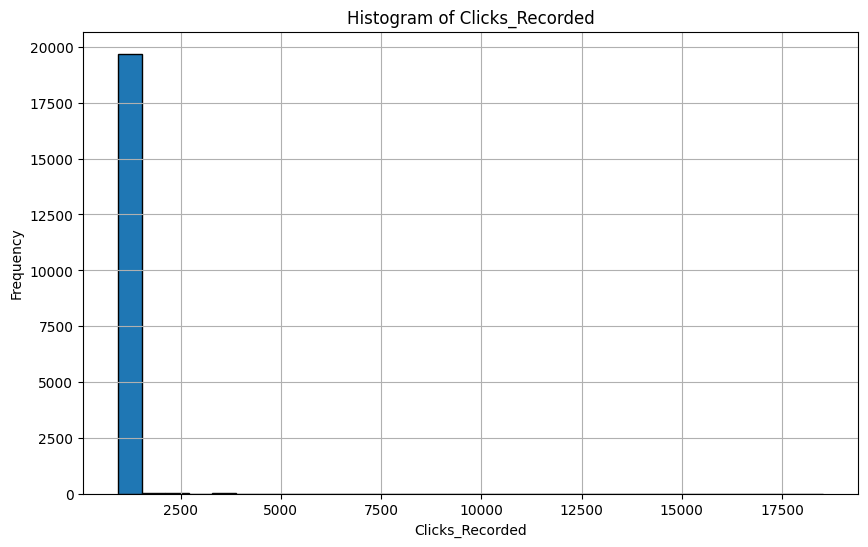

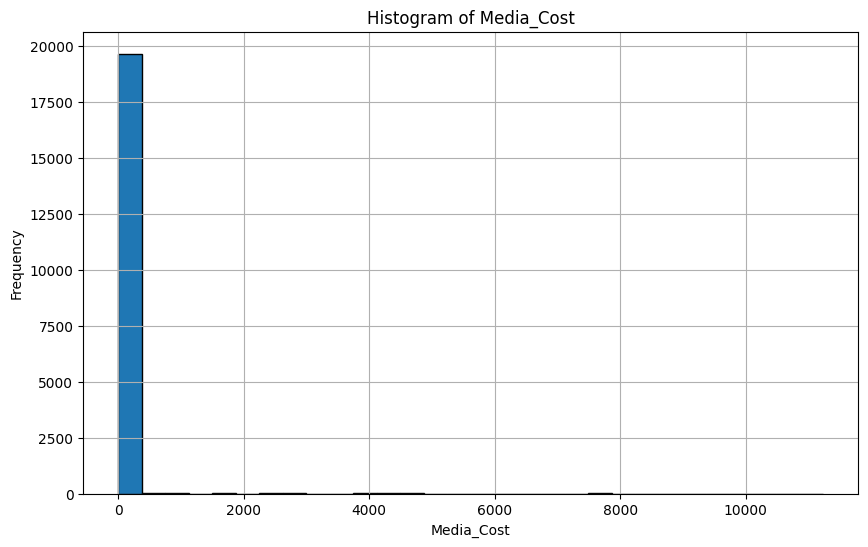

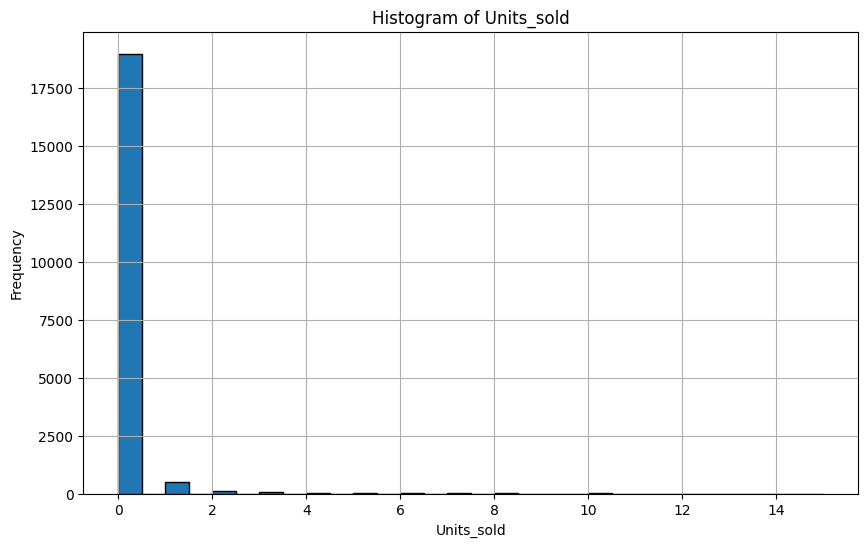

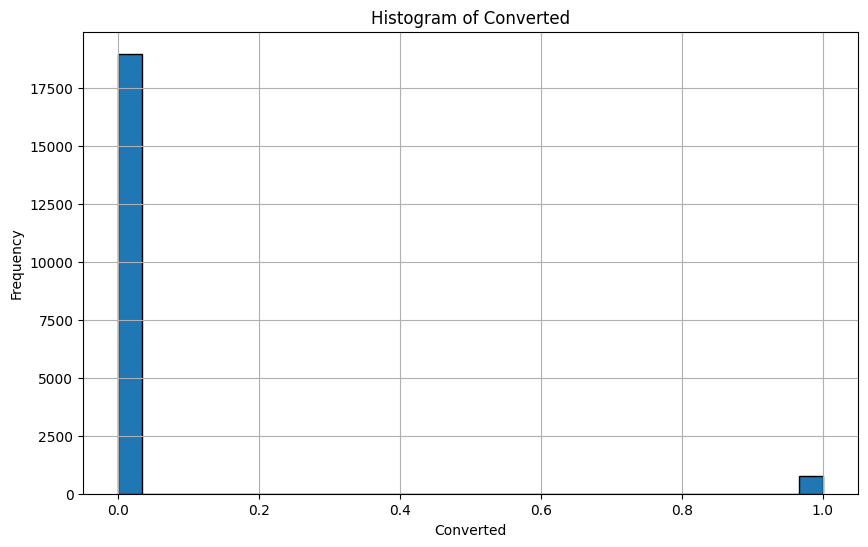

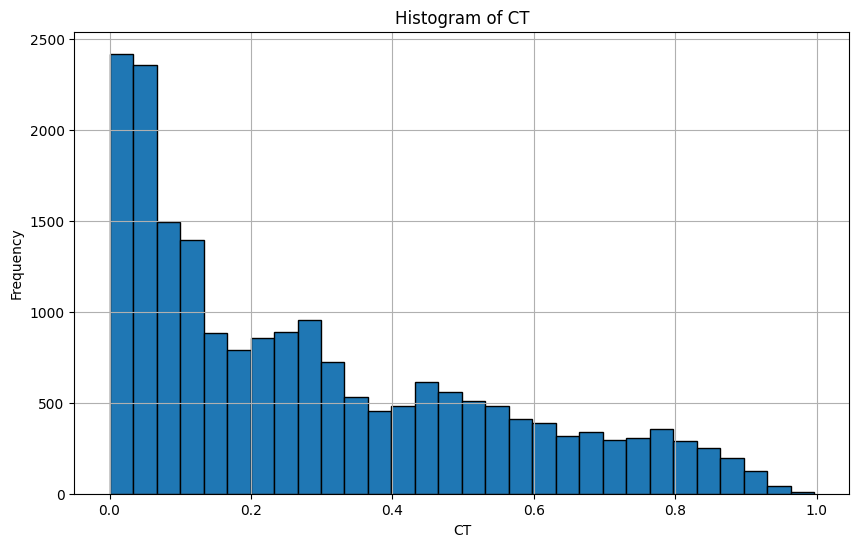

In [ ]:
# Plot distributions
plt.figure(figsize=(10, 8))

# All columns except 'Date' to plot
for col in df.columns:
    if col != 'Date':
        plt.figure(figsize=(10, 6))
        if df[col].dtype == 'object':
            sns.countplot(x=col, data=df)
            plt.title(f'Bar Plot of {col}')
            plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
            plt.show()
        else:
            df[col].hist(bins=30, edgecolor='black')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

Most campaigns have low units sold with a low media cost but high numbers of clicks recorded and impressions delivered. The most common content categories are advertising nets and behavioral target. The content creative is equally distributed between laptop and desktop, so this may not be an important predictor. The most frequent creatives are "super value", "best value", "better products", and "save money green logo" while the least frequent is the regular "save money" creative. Most creatives had the size 728x90 while close to 0 had 120x600 or 300x600 sizes. The most frequent websties used were collective media and microsoft DRIVEpm. There is only one type of campaign name so this will not be a useful predictor and we can drop it from our data.

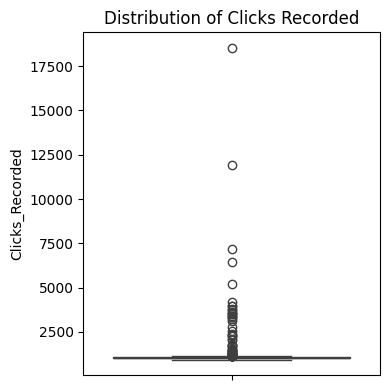

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(y = "Clicks_Recorded", data = df)
plt.title('Distribution of Clicks Recorded')
plt.tight_layout()
plt.show()

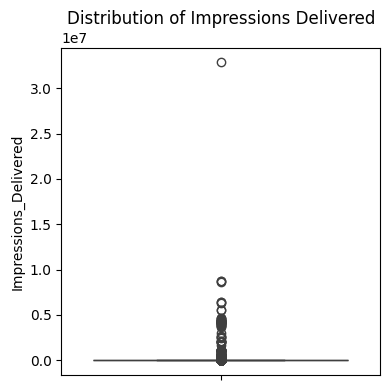

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(y = "Impressions_Delivered", data = df)
plt.title('Distribution of Impressions Delivered')
plt.tight_layout()
plt.show()

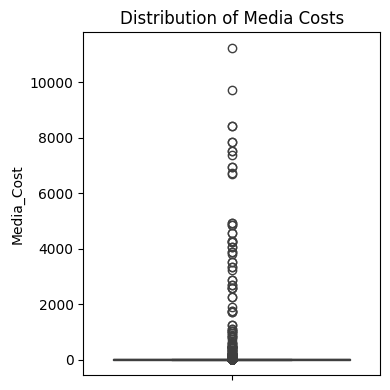

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(y = "Media_Cost", data = df)
plt.title('Distribution of Media Costs')
plt.tight_layout()
plt.show()

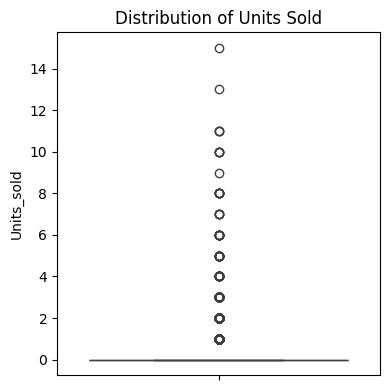

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(y = "Units_sold", data = df)
plt.title('Distribution of Units Sold')
plt.tight_layout()
plt.show()

The numerical values have a few outliers. We need to keep this in mind when developing our models so that we pick models that are less resistant to outiers.

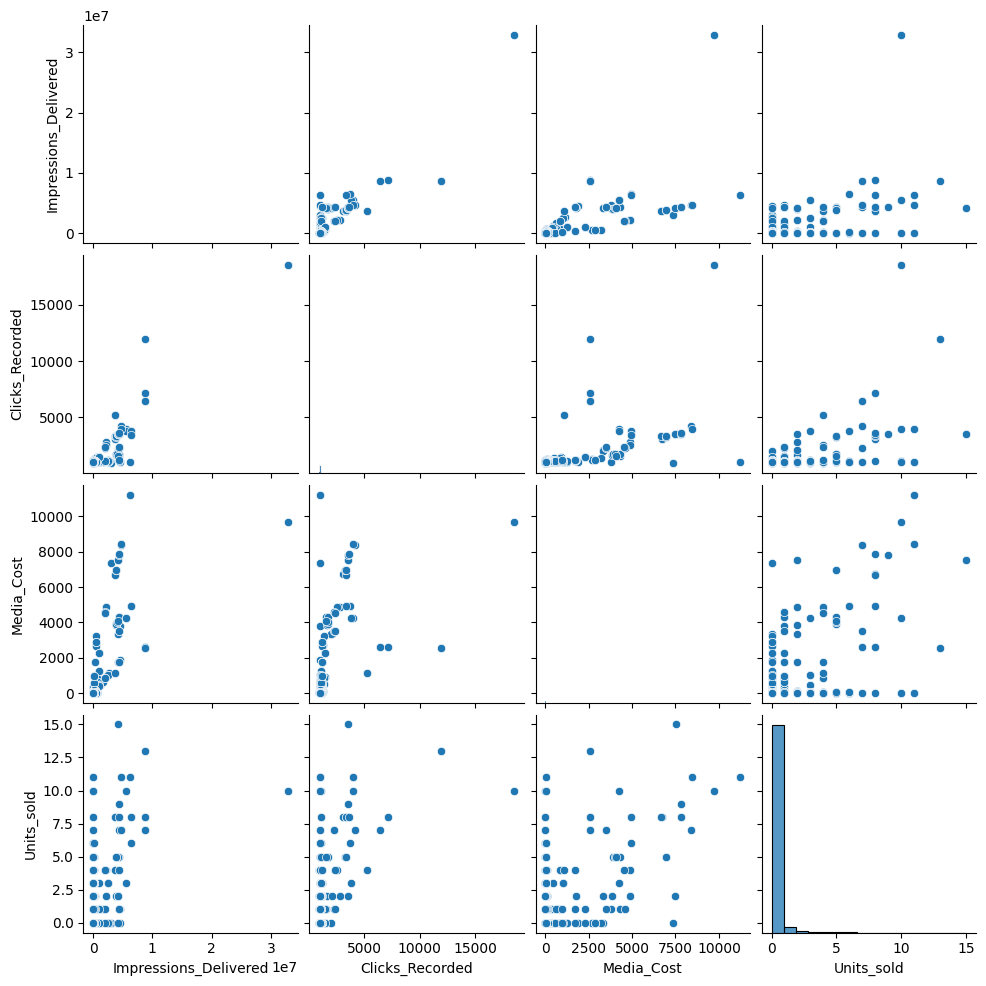

In [ ]:
sns.pairplot(df[['Impressions_Delivered', 'Clicks_Recorded', 'Media_Cost', 'Units_sold']])
plt.show()

All of the pair plots reveal positive relationships between the numerical variables. For any pair, as one variable increases then the other also increases. This is useful to see if increasing media costs may increase impressions delivered and clicks recorded.

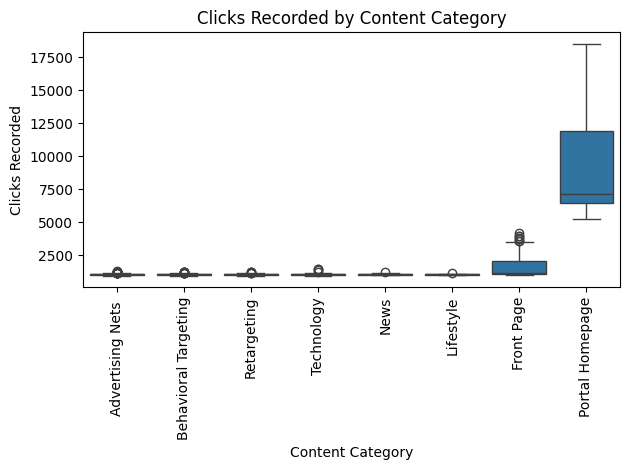

In [ ]:
sns.boxplot(x='Content_Category', y='Clicks_Recorded', data=df)
plt.title('Clicks Recorded by Content Category')
plt.xticks(rotation=90)
plt.xlabel("Content Category")
plt.ylabel("Clicks Recorded")
plt.tight_layout()
plt.show()

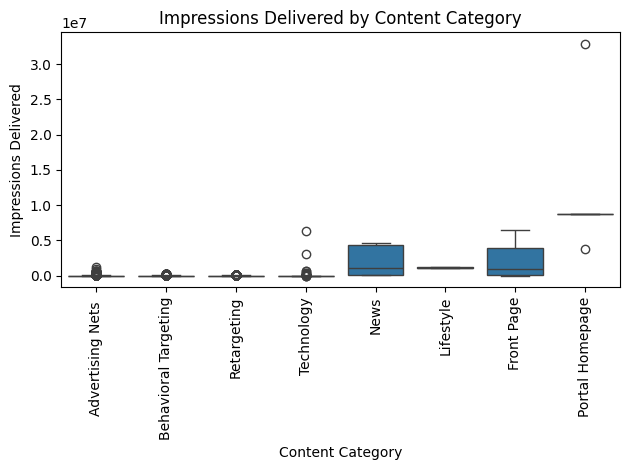

In [ ]:
sns.boxplot(x='Content_Category', y='Impressions_Delivered', data=df)
plt.title('Impressions Delivered by Content Category')
plt.xticks(rotation=90)
plt.xlabel("Content Category")
plt.ylabel("Impressions Delivered")
plt.tight_layout()
plt.show()

The news and front page content categories had higher impressions delivered while the categories front page and portal homepage had higher clicks recorded. It seems that if the content is on the landing page of a website or product, there may be higher impressions delivered and clicks recorded.

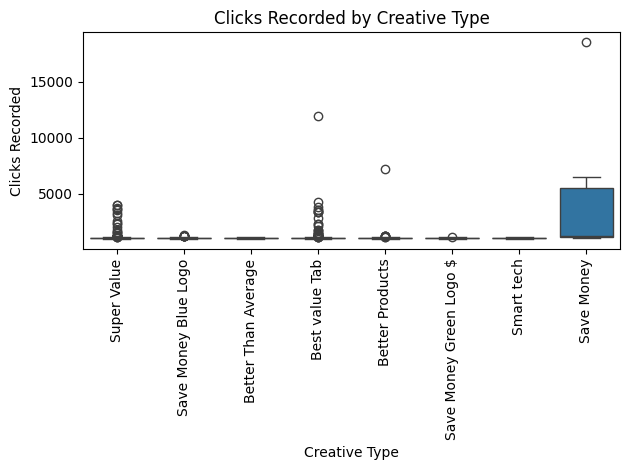

In [ ]:
sns.boxplot(x='Creative', y='Clicks_Recorded', data=df)
plt.title('Clicks Recorded by Creative Type')
plt.xticks(rotation=90)
plt.xlabel("Creative Type")
plt.ylabel("Clicks Recorded")
plt.tight_layout()
plt.show()

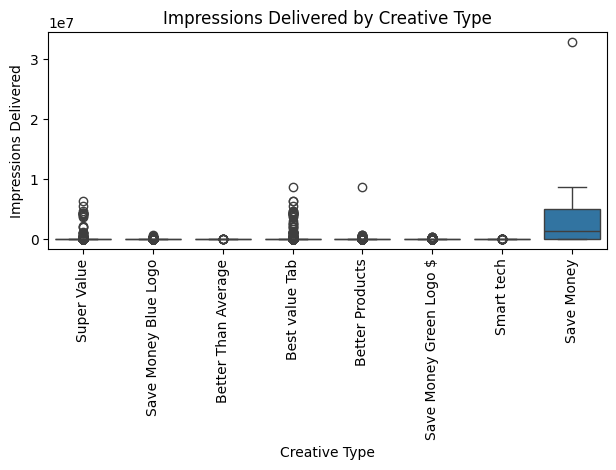

In [ ]:
sns.boxplot(x='Creative', y='Impressions_Delivered', data=df)
plt.title('Impressions Delivered by Creative Type')
plt.xticks(rotation=90)
plt.xlabel("Creative Type")
plt.ylabel("Impressions Delivered")
plt.tight_layout()
plt.show()

The "save money" creative category had higher impressions delivered and clicks recorded than the other categories, suggesting this may be a more useful category for creating succesful marketing campaigns.

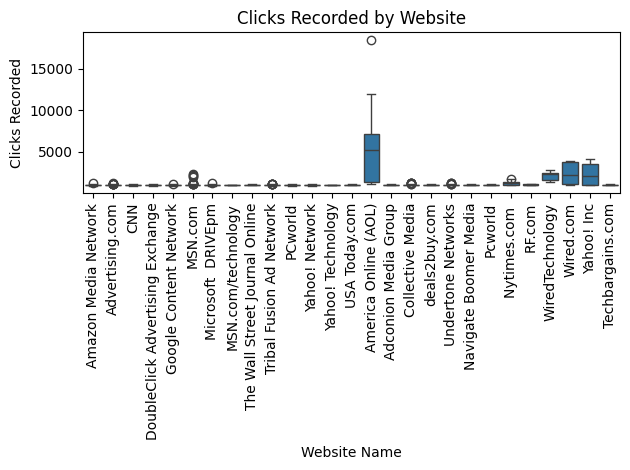

In [ ]:
sns.boxplot(x='Website / Network Name ', y='Clicks_Recorded', data=df)
plt.title('Clicks Recorded by Website')
plt.xticks(rotation=90)
plt.xlabel("Website Name")
plt.ylabel("Clicks Recorded")
plt.tight_layout()
plt.show()

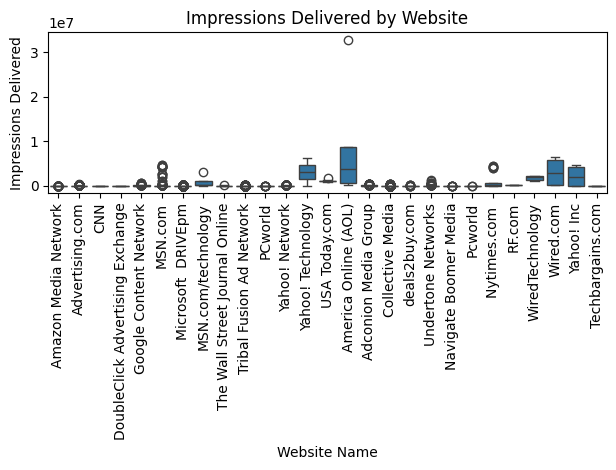

In [ ]:
sns.boxplot(x='Website / Network Name ', y='Impressions_Delivered', data=df)
plt.title('Impressions Delivered by Website')
plt.xticks(rotation=90)
plt.xlabel("Website Name")
plt.ylabel("Impressions Delivered")
plt.tight_layout()
plt.show()

AOL, wired.com, and yahoo inc., have higher clicks recorded and impressions delivered than other websites. Yahoo tech is also one of the websites with higher impressions delivered. These four websites may be key places to target for a succesful marketing campaign.

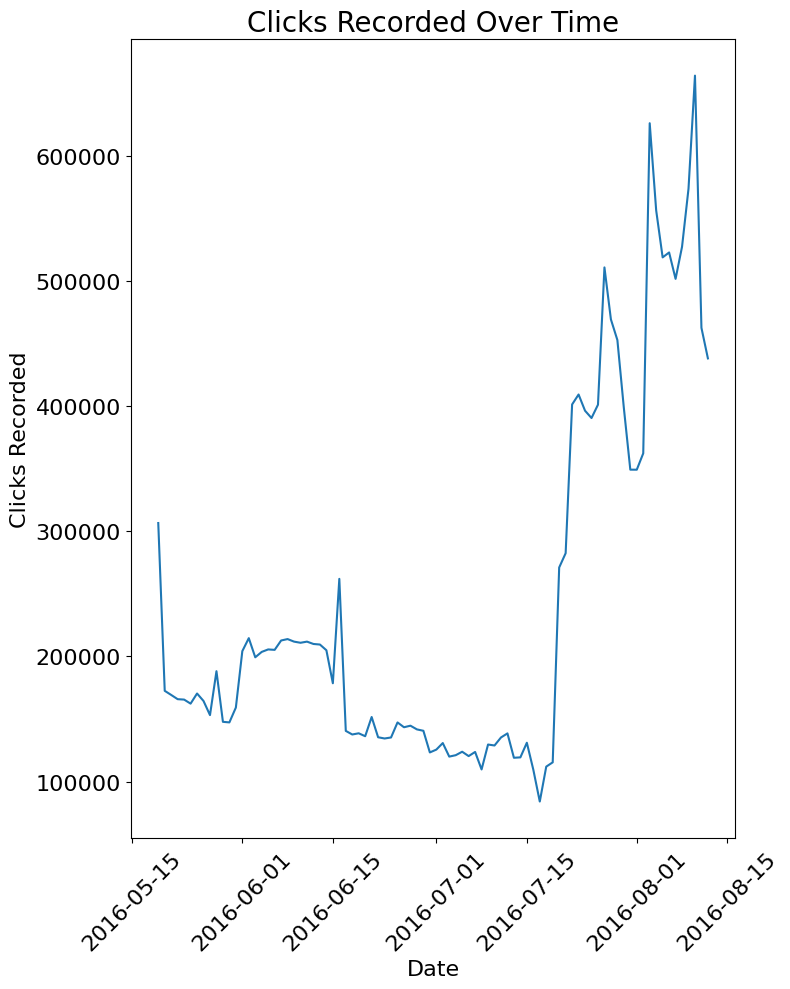

In [ ]:
df_daily = df.groupby('Date')['Clicks_Recorded'].sum().reset_index()

plt.figure(figsize=(8, 10))
sns.lineplot(x='Date', y='Clicks_Recorded', data=df_daily)

plt.title('Clicks Recorded Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Clicks Recorded', fontsize = 16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

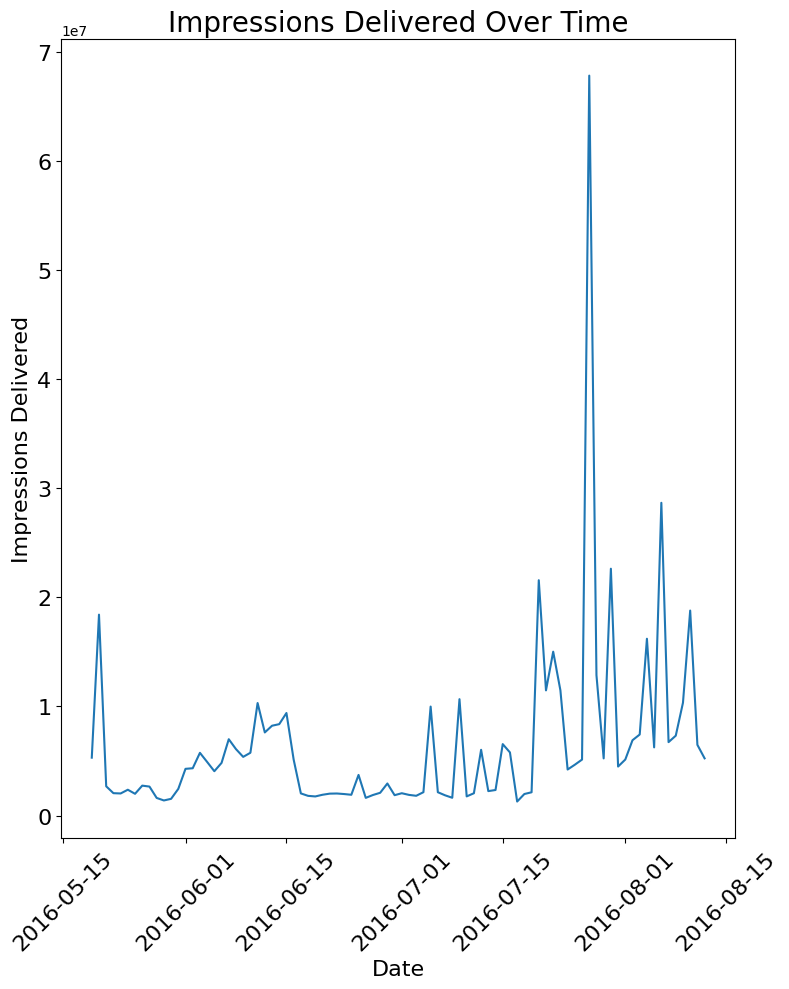

In [ ]:
df_daily = df.groupby('Date')['Impressions_Delivered'].sum().reset_index()

plt.figure(figsize=(8, 10))
sns.lineplot(x='Date', y='Impressions_Delivered', data=df_daily)

plt.title('Impressions Delivered Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Impressions Delivered', fontsize = 16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

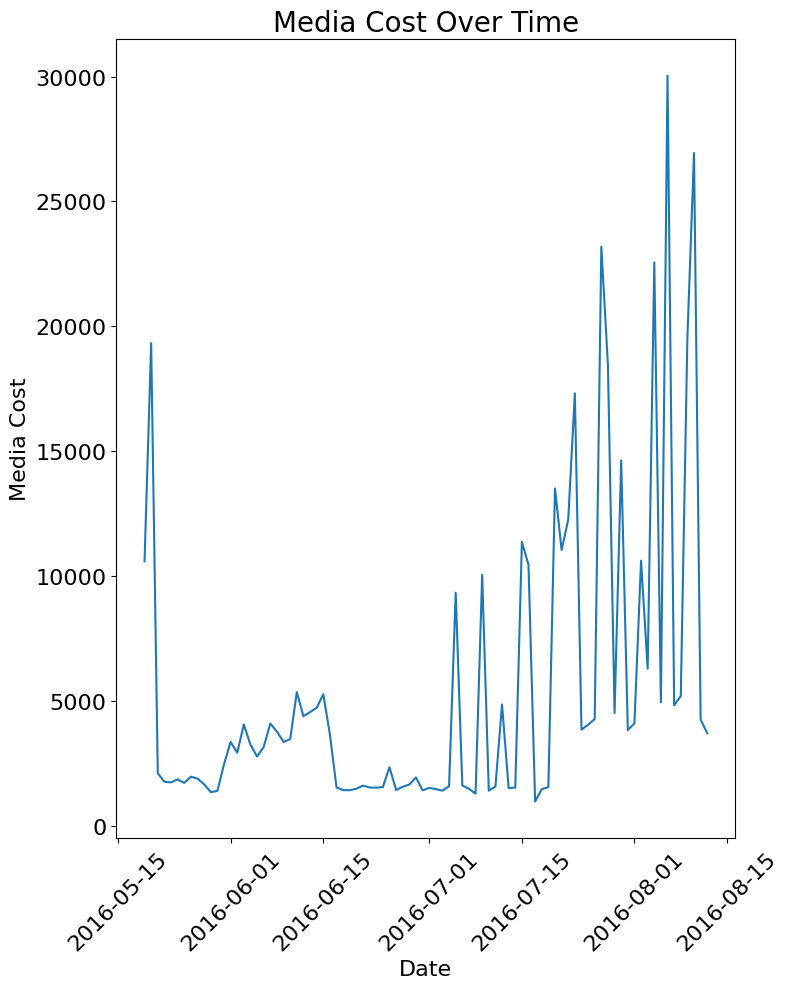

In [ ]:
df_daily = df.groupby('Date')['Media_Cost'].sum().reset_index()

plt.figure(figsize=(8, 10))
sns.lineplot(x='Date', y='Media_Cost', data=df_daily)

plt.title('Media Cost Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Media Cost', fontsize = 16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

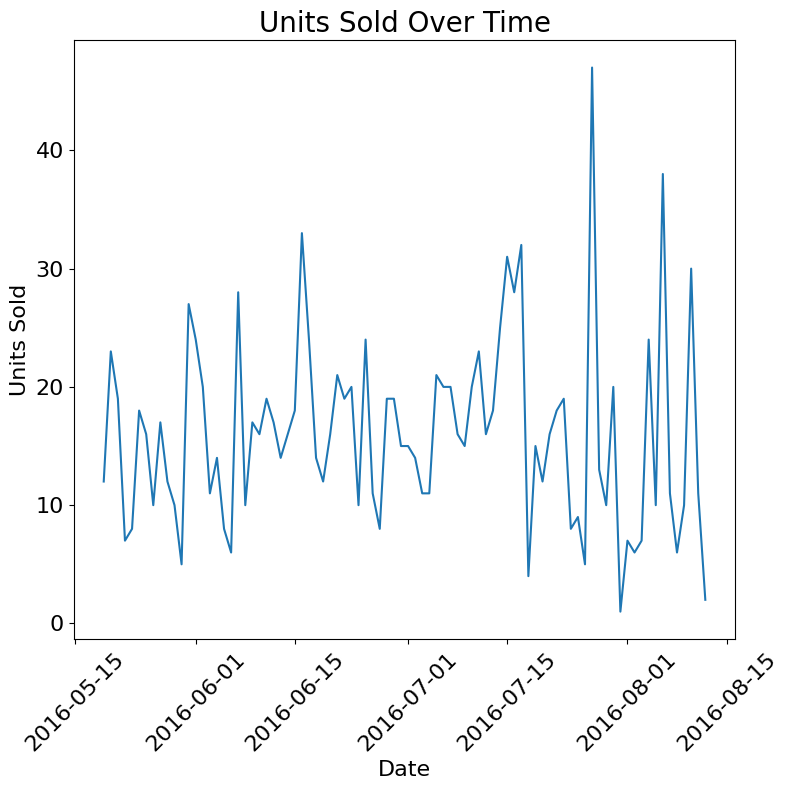

In [ ]:
df_daily = df.groupby('Date')['Units_sold'].sum().reset_index()

plt.figure(figsize=(8, 8))
sns.lineplot(x='Date', y='Units_sold', data=df_daily)

plt.title('Units Sold Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Units Sold', fontsize = 16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Units sold over time has a relatively stable trend, with a spike/increase between July and August 2016. Media cost has a decreasing trend until it remains stable at it's lowest cost for a few months, then it suddenly starts increasing with several spikes after July 2016. This is the same trend/pattern seen with impressions delivered and clicks recorded over time, however, those time series have less spikes during the period of increase. If possible, it would be helpful to research into what changed around July 2016 to cause these dramatic effects over time. This also highlights that regardless of the change in media costs over time on these campaigns, units sold/conversions, remained stable, so it could be possible these campaigns aren't driving additional sales which is causing the imbalance in our dataset that makes it hard to develop a good model.

In [ ]:
# Add conversion col
df['Conversion'] = df['Units_sold'].apply(lambda x: 1 if x >= 1 else 0)

In [ ]:
# Add click Through
df['CT'] = df['Clicks_Recorded'] / df['Impressions_Delivered']

<ipython-input-46-2ac7c5ed68e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Conversion', data=df, palette="viridis")


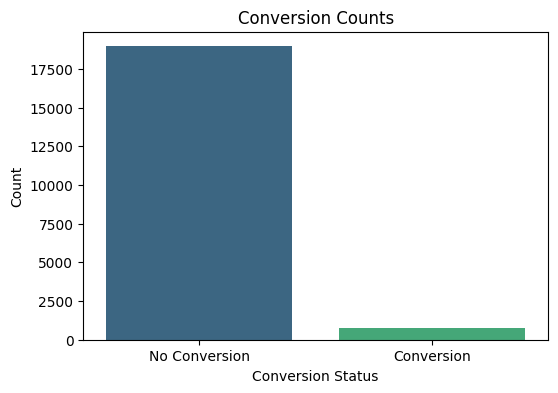

In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(x='Conversion', data=df, palette="viridis")
plt.xticks(ticks=[0, 1], labels=['No Conversion', 'Conversion'])
plt.title('Conversion Counts')
plt.xlabel('Conversion Status')
plt.ylabel('Count')

plt.show()

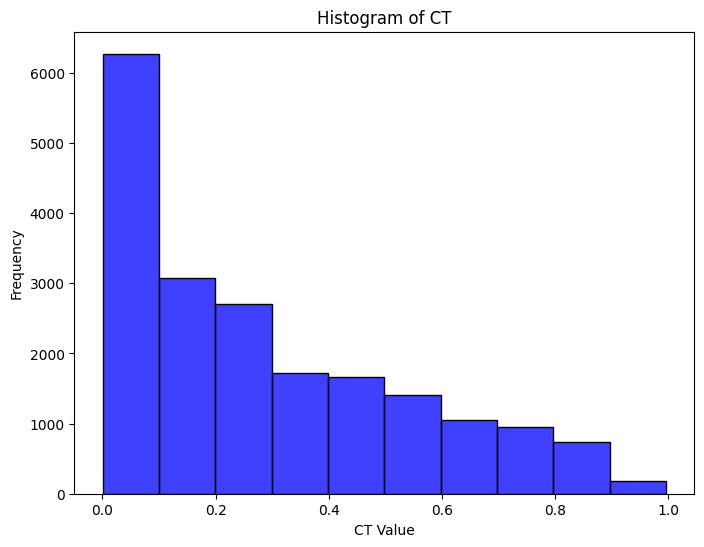

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CT'], bins=10, kde=False, color='blue', edgecolor='black')

plt.title('Histogram of CT')
plt.xlabel('CT Value')
plt.ylabel('Frequency')

plt.show()

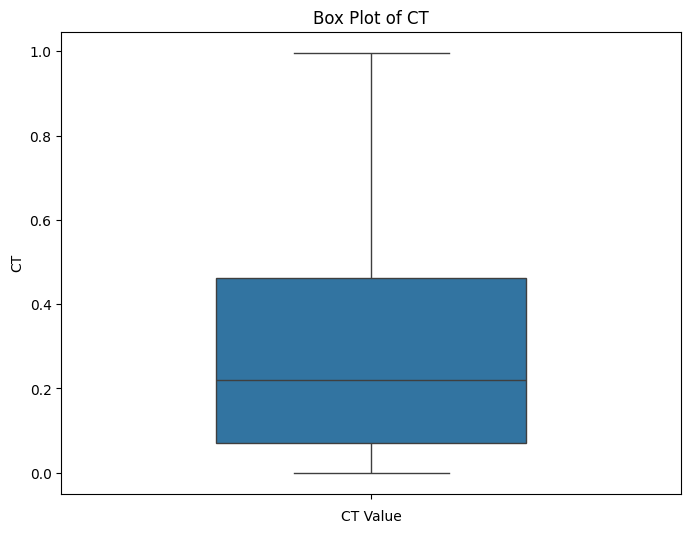

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='CT', data = df, width=0.5)

# Adding titles and labels
plt.title('Box Plot of CT')
plt.xlabel('CT Value')

# Display the plot
plt.show()

There's a higher frequency of lower click through values, with very few campaigns having high click throughs close to 1. As observed before, we see that there is an extreme class imbalance for conversions, with a majority of campaigns having more non-conversions than conversions.

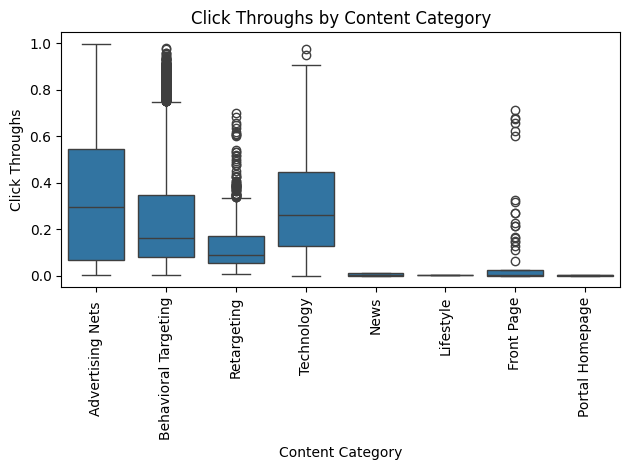

In [ ]:
sns.boxplot(x='Content_Category', y='CT', data=df)
plt.title('Click Throughs by Content Category')
plt.xticks(rotation=90)
plt.xlabel("Content Category")
plt.ylabel("Click Throughs")
plt.tight_layout()
plt.show()

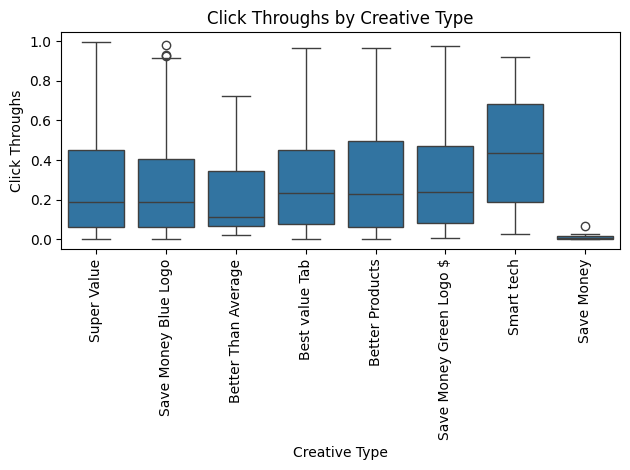

In [ ]:
sns.boxplot(x='Creative', y='CT', data=df)
plt.title('Click Throughs by Creative Type')
plt.xticks(rotation=90)
plt.xlabel("Creative Type")
plt.ylabel("Click Throughs")
plt.tight_layout()
plt.show()

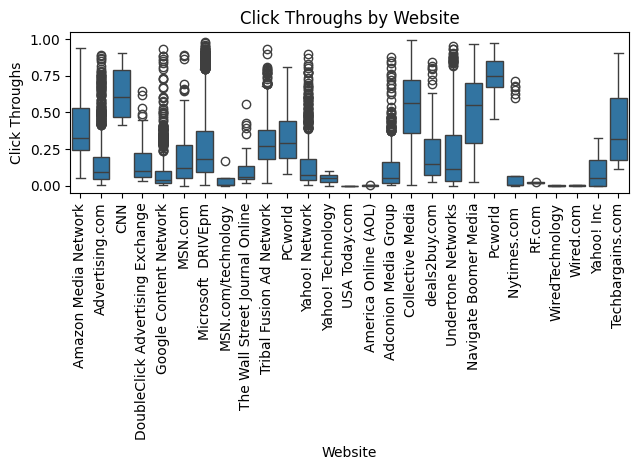

In [ ]:
sns.boxplot(x='Website / Network Name ', y='CT', data=df)
plt.title('Click Throughs by Website')
plt.xticks(rotation=90)
plt.xlabel("Website")
plt.ylabel("Click Throughs")
plt.tight_layout()
plt.show()

The websites CNN, Collective Media, Navigate Boomer Media, and PCWorld, have higher click throughs than other websites. This is a notably different observation of websites compared to what we saw with impressions delivered and clicks recorded. The creative types all seem to have similar distributions of click throughs, with the exception of smart tech having higher amounts and save money having few amounts. The content categories of advertising nets, behavior training, and technology have higher click throughs.

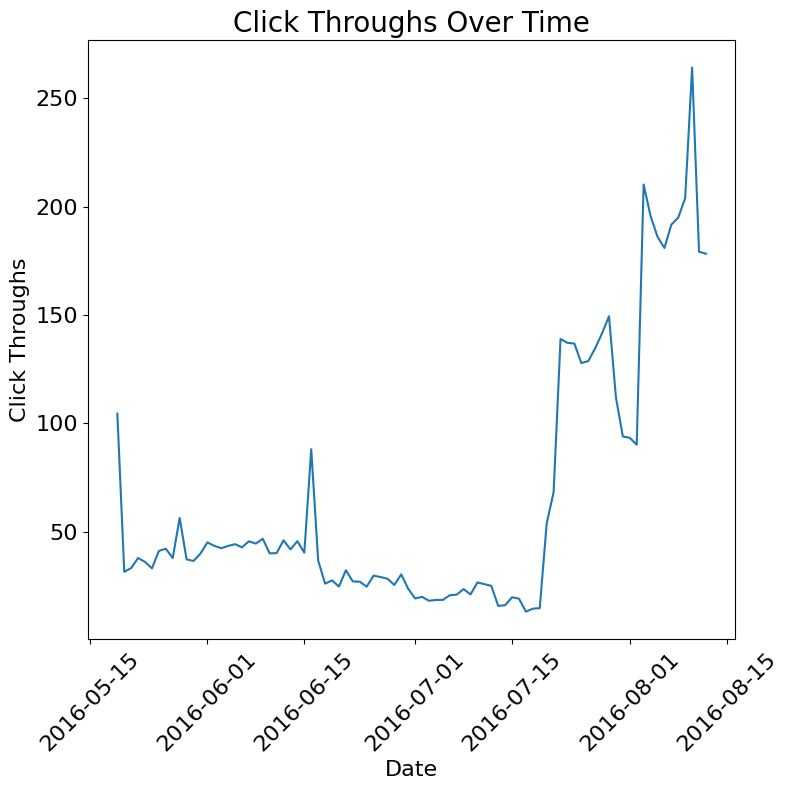

In [ ]:
df_daily = df.groupby('Date')['CT'].sum().reset_index()

plt.figure(figsize=(8, 8))
sns.lineplot(x='Date', y='CT', data=df_daily)

plt.title('Click Throughs Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Click Throughs', fontsize = 16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Click throughs over time follows a similar trend as the time series for impressions delivered and clicks recorded -- decreasing at the start, with a lull until july 2016, followed by a sharp increase.

# Click Through Models

### Train/Test Split

In [ ]:
# create column for click throughs (CT)
df_A = df
df_A['CT'] = df_A['Clicks_Recorded'] / (df_A['Impressions_Delivered'])

In [ ]:
# Drop columns we don't want to directly feed into the model
df_ctr = df_A.drop(columns=['Clicks_Recorded', 'Impressions_Delivered', 'Date', 'CT'])
categorical_cols = df_A.select_dtypes(include=['object', 'category']).columns.tolist()

y_ctr = df_A['CT']

# One-hot encode ONLY the categorical columns
X_ctr = pd.get_dummies(df_ctr, columns=categorical_cols, drop_first=True)

In [ ]:
X_ctr.columns

Index(['Media_Cost', 'Units_sold', 'Content_Category_Behavioral Targeting',
       'Content_Category_Front Page', 'Content_Category_Lifestyle',
       'Content_Category_News', 'Content_Category_Portal Homepage',
       'Content_Category_Retargeting', 'Content_Category_Technology',
       'Creative_Product_Laptop', 'Creative_Better Products',
       'Creative_Better Than Average', 'Creative_Save Money',
       'Creative_Save Money Blue Logo', 'Creative_Save Money Green Logo $',
       'Creative_Smart tech', 'Creative_Super Value', 'Creative_Size_160x600',
       'Creative_Size_300x250', 'Creative_Size_300x600',
       'Creative_Size_336x280', 'Creative_Size_728x90',
       'Website / Network Name _Advertising.com',
       'Website / Network Name _Amazon Media Network',
       'Website / Network Name _America Online (AOL)',
       'Website / Network Name _CNN',
       'Website / Network Name _Collective Media',
       'Website / Network Name _DoubleClick Advertising Exchange',
       'We

In [ ]:
X_train_ctr, X_test_ctr, y_train_ctr, y_test_ctr = train_test_split(X_ctr, y_ctr, test_size=0.2, random_state=7)

###Linear Regression

In [ ]:
# Creating and fitting the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_ctr, y_train_ctr)

# Predicting on the test set
y_pred_ctr = lr_model.predict(X_test_ctr)

# Calculating the error metrics
mse_ctr = mean_squared_error(y_test_ctr, y_pred_ctr)
rmse_ctr = np.sqrt(mse_ctr)
r2_ctr = r2_score(y_test_ctr, y_pred_ctr)

print("RMSE:", rmse_ctr)
print("R-squared:", r2_ctr)

RMSE: 0.18694003505563744
R-squared: 0.4560988828074525


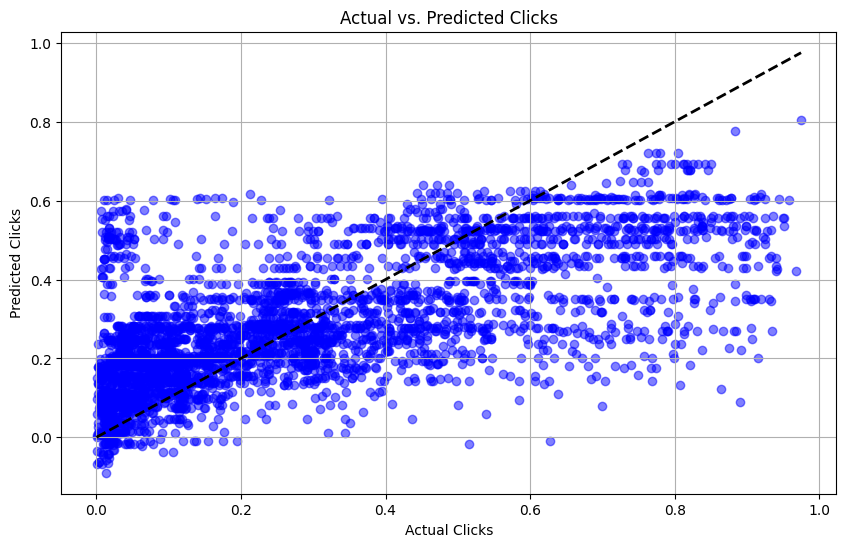

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ctr,y_pred_ctr , alpha=0.5, color='blue')  # Predicted vs. actual values
plt.plot([y_test_ctr.min(), y_test_ctr.max()], [y_test_ctr.min(), y_test_ctr.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('Actual vs. Predicted Clicks')
plt.grid(True)
plt.show()

RMSE (Root Mean Squared Error): 0.1869 — This is relatively low, which generally indicates that our model has a good fit to the data.

R-squared (Coefficient of Determination): 0.4561 — This value explains that about 45.61% of the variance in our target variable is predictable from the independent variables. This is slightly on the low end.

Our model seems to perform adequately at lower values of clicks but struggles with higher values. This might be due to outliers, high leverage points, or non-linearity in the relationship between predictors and the target.

Potential Improvements:
- Adding Non-linear Transformations
- Robust Regression Techniques



### Log Linear

In [ ]:
df_A['log_CT'] = np.log(df_A['Clicks_Recorded'] / df_A['Impressions_Delivered'] + 1e-9)

# Prepare the data for modeling
df_ctr = df_A.drop(columns=['Clicks_Recorded', 'Impressions_Delivered', 'Date','log_CT','CT'])

# Identifying categorical columns
categorical_cols = df_A.select_dtypes(include=['object', 'category']).columns.tolist()
X_ctr = pd.get_dummies(df_ctr, columns=categorical_cols, drop_first=True)

# Preparing the target variable
y_ctr = df_A['log_CT']

# Splitting the data into training and testing sets
X_train_ctr_1, X_test_ctr_1, y_train_ctr_1, y_test_ctr_1 = train_test_split(X_ctr, y_ctr, test_size=0.2, random_state=7)

# Creating and fitting the linear regression model
lr_log_model = LinearRegression()
lr_log_model.fit(X_train_ctr_1, y_train_ctr_1)

# Predicting on the test set
y_pred_ctr_log = lr_log_model.predict(X_test_ctr_1)

# Calculating the error metrics
mse_ctr_log = mean_squared_error(y_test_ctr_1, y_pred_ctr_log)
rmse_ctr_log = np.sqrt(mse_ctr_log)
r2_ctr_log = r2_score(y_test_ctr_1, y_pred_ctr_log)

print("RMSE:", rmse_ctr_log)
print("R-squared:", r2_ctr_log)

RMSE: 0.9349747703927247
R-squared: 0.4605427975068086


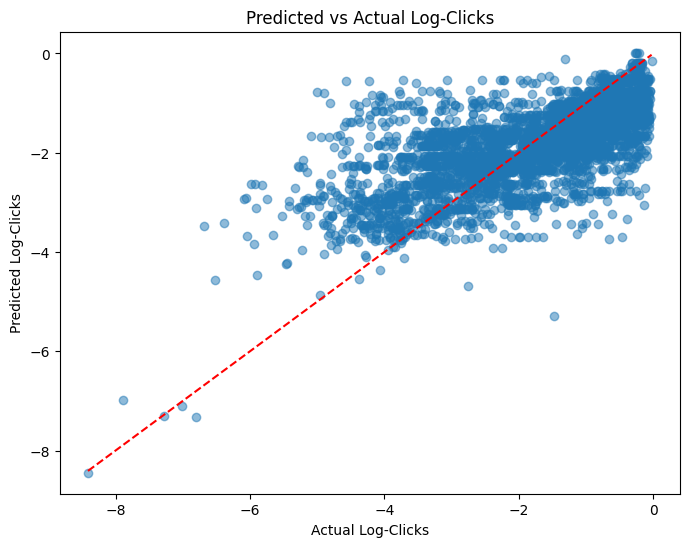

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_ctr_1, y_pred_ctr_log, alpha=0.5)
plt.title('Predicted vs Actual Log-Clicks')
plt.xlabel('Actual Log-Clicks')
plt.ylabel('Predicted Log-Clicks')
plt.plot([min(y_test_ctr_1), max(y_test_ctr_1)], [min(y_test_ctr_1), max(y_test_ctr_1)], 'r--')  # Diagonal line
plt.show()

RMSE: 0.9349 — This value suggests that on average, the model's predictions of the logarithm of clicks deviate from the actual logarithmic values by about 0.9349. Given that we are dealing with logarithmic values, this deviation could represent significant differences, particularly when exponentiated back to the original click scale.

R-squared: 0.4605 — Approximately 46.05% of the variance in the logarithmic transformation of clicks is explained by your model. This indicates a moderate fit, which shows the model captures less than half of the available variance in the data.

Comparing with linear model, log-linear approach seems more appropriate for capturing the underlying patterns without being unduly influenced by extreme values.

The moderate R-squared value coupled with the visualization suggests that the model, while generally effective, could benefit from refinements, particularly in capturing the behavior at the lower and higher ends of the log-click range.

Potential Improvements:
- Adding Complexity
- Advanced Regression Techniques


### Poission Model

In [ ]:
param_grid = {
    'alpha': [0.0, 0.1, 1.0, 10.0],  # Regularization strength
    'max_iter': [100, 300, 500]
}


poisson_model = PoissonRegressor()
grid_search = GridSearchCV(
    estimator=poisson_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',  # or 'neg_mean_poisson_deviance' (sklearn>=1.2)
    verbose=1
)

In [ ]:
grid_search.fit(X_train_ctr, y_train_ctr)

print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

Best Params: {'alpha': 0.0, 'max_iter': 100}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [ ]:
# Predict on test set
y_pred = grid_search.predict(X_test_ctr)


pois_rmse = np.sqrt(mean_squared_error(y_test_ctr, y_pred))
r2 = r2_score(y_test_ctr, y_pred)
print("Poisson Model - RMSE:", pois_rmse)
print("Poisson Model - R^2:", r2)


Poisson Model - RMSE: 0.10669064896911172
Poisson Model - R^2: 0.8228390400141717


In the Poisson regression model, we achieved an RMSE of 0.1067 and an R² of 0.8228. This indicates that the model explains approximately 82% of the variability in the outcome, suggesting a good fit for predicting count-based responses. The relatively low RMSE further implies that the model’s predictions are, on average, quite close to the observed values.

### XGBoost Regression

In [ ]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500]
}


grid_seach = GridSearchCV(
    XGBRegressor(tree_method='hist', device='cuda', random_state=7),
    param_grid=param_grid)

grid_seach.fit(X_train_ctr, y_train_ctr)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:43] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:43] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:43] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:43] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:46] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnin

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=7, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 300, 500]})

In [ ]:
y_pred_ctr = grid_seach.predict(X_test_ctr)

xgbr_rmse = np.sqrt(mean_squared_error(y_test_ctr, y_pred_ctr))
r2 = r2_score(y_test_ctr, y_pred_ctr)

print("CT Model - RMSE:", xgbr_rmse)
print("CT Model - R^2:", r2)

CT Model - RMSE: 0.056366171314555694
CT Model - R^2: 0.9505515840473815


For this regression model, we obtained an RMSE of 0.0564 and an R² of 0.9506, indicating that the model explains roughly 95% of the variance in the target variable. The relatively low RMSE value also suggests that the predictions are, on average, very close to the observed data points, highlighting the strong predictive performance of this XGBoost model.

### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42)

param_distributions = {
    'n_estimators': [1, 10, 100, 500, 750],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [1, 5, 10],
    'min_samples_leaf': [2, 5, 10, 20, 30],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    scoring='r2',
    n_jobs=30,
    verbose=5,
    random_state=42
)

random_search.fit(X_train_ctr, y_train_ctr)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
114 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
114 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 20, 30],
                                        'min_samples_split': [1, 5, 10],
                                        'n_estimators': [1, 10, 100, 500, 750]},
                   random_state=42, scoring='r2', verbose=5)

In [ ]:
best_rf = random_search.best_estimator_
test_preds = best_rf.predict(X_test_ctr)
rfr_rmse = np.sqrt(mean_squared_error(y_test_ctr, test_preds))
r2 = r2_score(y_test_ctr, test_preds)
print("RMSE:", rfr_rmse)
print("R-squared:", r2)

RMSE: 0.06285147747023584
R-squared: 0.9385182396474578


The results from using a Random Forest Regressor on your data show significant improvement over the linear and log-linear models and the poisson model previously discussed.

RMSE (Root Mean Squared Error): 0.0629 — This is an exceptionally low value, suggesting that the predictions made by the Random Forest model are very close to the actual data points.

R-squared (Coefficient of Determination): 0.9385 — This value is substantially higher than what was observed in the linear and log-linear models and the poisson model. An R-squared of approximately 93.85% means that nearly 94% of the variance in the dependent variable is predictable from the independent variables using this model.

The Random Forest Regressor has demonstrated excellent performance on our dataset. It offers a significant improvement over simpler models and shows robustness in handling the complexities of our data.

Potential Improvements:
- Hyperparameter Optimization
- Feature Transformation

# Conversion Models


### Train/Test Split

In [ ]:
# BINARY
df_B = df
df_B['Converted'] = (df_B['Units_sold'] > 0).astype(int)
df_conv = df_B.drop(columns=["Units_sold"])
y_conv = df_conv["Converted"] # target
df_conv = df_conv.drop(columns=["Converted", "Date", "CT"])

In [ ]:
df_conv = pd.get_dummies(df_conv, drop_first=True)
X_conv = df_conv.copy()

In [ ]:
X_conv.columns

Index(['Impressions_Delivered', 'Clicks_Recorded', 'Media_Cost',
       'Content_Category_Behavioral Targeting', 'Content_Category_Front Page',
       'Content_Category_Lifestyle', 'Content_Category_News',
       'Content_Category_Portal Homepage', 'Content_Category_Retargeting',
       'Content_Category_Technology', 'Creative_Product_Laptop',
       'Creative_Better Products', 'Creative_Better Than Average',
       'Creative_Save Money', 'Creative_Save Money Blue Logo',
       'Creative_Save Money Green Logo $', 'Creative_Smart tech',
       'Creative_Super Value', 'Creative_Size_160x600',
       'Creative_Size_300x250', 'Creative_Size_300x600',
       'Creative_Size_336x280', 'Creative_Size_728x90',
       'Website / Network Name _Advertising.com',
       'Website / Network Name _Amazon Media Network',
       'Website / Network Name _America Online (AOL)',
       'Website / Network Name _CNN',
       'Website / Network Name _Collective Media',
       'Website / Network Name _DoubleCl

In [ ]:
X_train_conv, X_test_conv, y_train_conv, y_test_conv = train_test_split(X_conv, y_conv, test_size=0.2, stratify=y_conv, random_state=7)

### XGBoost Classifier

#### XGBoost with SMOTE

In [ ]:
# SMOTE

'''
# If using GPU:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=7)),
    ('xgb', XGBClassifier(tree_method='hist', device='cuda', random_state=7))
])
'''
pipeline = Pipeline([
    ('smote', SMOTE(random_state=7)),
    ('xgb', XGBClassifier(tree_method='hist', random_state=7))
])

param_grid = {
    'xgb__max_depth': [3, 6, 9],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__n_estimators': [100, 300, 500]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1
)

grid_search.fit(X_train_conv, y_train_conv)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}


In [ ]:
# Predictions
y_pred_conv = grid_search.predict(X_test_conv)
y_proba = grid_search.predict_proba(X_test_conv)[:, 1]

# Custom threshold for recall improvement
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test_conv, y_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test_conv, y_pred_custom))

print("\nROC AUC:", roc_auc_score(y_test_conv, y_proba))

Confusion Matrix:
[[3315  478]
 [  40  114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3793
           1       0.19      0.74      0.31       154

    accuracy                           0.87      3947
   macro avg       0.59      0.81      0.62      3947
weighted avg       0.96      0.87      0.90      3947


ROC AUC: 0.8955697611115486


In [ ]:
accuracy_test = accuracy_score(y_test_conv, y_pred_custom)
recall_test = recall_score(y_test_conv, y_pred_custom)
cm_test = confusion_matrix(y_test_conv, y_pred_custom)

print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test Confusion Matrix:\n", cm_test)

Test Accuracy: 0.8687610843678744
Test Recall: 0.7402597402597403
Test Confusion Matrix:
 [[3315  478]
 [  40  114]]


For this model, we applied SMOTE to address class imbalance before training an XGBoost classifier. The test accuracy is approximately 86.88%, and the recall for the positive class is 74.03%, indicating that the model correctly identifies a substantial portion of the positive instances. The ROC AUC is 0.8956, suggesting strong overall discrimination between classes. However, the precision for class 1 remains low (around 0.19), which results in an F1-score of 0.31. This trade-off reflects a relatively high number of false positives compared to true positives.

### Random Forest

In [ ]:
# Applying random oversampling to balance the dataset
ros = RandomOverSampler(random_state=7)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_conv, y_train_conv)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
}

rf = RandomForestClassifier(random_state=7)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1')

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
best_rf = RandomForestClassifier(**best_params, random_state=7)
best_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(n_estimators=50, random_state=7)

In [ ]:
# Making predictions on the test set
y_pred = best_rf.predict(X_test_conv)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test_conv, y_pred))
print("\nClassification Report:\n", classification_report(y_test_conv, y_pred))

Confusion Matrix:
 [[3737   56]
 [  91   63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3793
           1       0.53      0.41      0.46       154

    accuracy                           0.96      3947
   macro avg       0.75      0.70      0.72      3947
weighted avg       0.96      0.96      0.96      3947



For this model, the overall accuracy is 96%, indicating strong performance in predicting the majority class. However, the recall for class 1 (conversions) is only 41%, meaning the model misses a significant portion of actual conversions. The precision for class 1 is 53%, suggesting that when the model does predict a conversion, it is correct just over half the time. The imbalance between class 0 (non-conversions) and class 1 is evident, as the model performs exceptionally well on class 0 (98% precision, 99% recall) but struggles with class 1. This results in a macro-averaged recall of 70%, highlighting the difficulty in accurately identifying conversions.

### Logistic Regression

In [ ]:
# Make the data have the correct data types and apply scaling
numerical_columns = X_train_conv.select_dtypes(include=['int64']).columns
numerical_columns = numerical_columns[numerical_columns != "Units_sold"]
scaler = StandardScaler()
X_train_conv_encod = X_train_conv.copy()
X_test_conv_encod = X_test_conv.copy()
X_train_conv_encod[numerical_columns] = scaler.fit_transform(X_train_conv_encod[numerical_columns])
X_test_conv_encod[numerical_columns] = scaler.fit_transform(X_test_conv_encod[numerical_columns])
X_train_conv_encod = X_train_conv_encod.astype(int)
X_test_conv_encod = X_test_conv_encod.astype(int)

In [ ]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=7)
X_train, y_train = smote.fit_resample(X_train_conv_encod, y_train_conv)
print(f"Original class distribution in the training data: {y_train_conv.value_counts()}")
print(f"Resampled class distribution: {pd.Series(y_train).value_counts()}")

Original class distribution in the training data: Converted
0    15170
1      618
Name: count, dtype: int64
Resampled class distribution: Converted
0    15170
1    15170
Name: count, dtype: int64


In [ ]:
# Perform logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=7)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=7)

In [ ]:
# Train prediction and metrics
y_train_pred = log_reg.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
cm = confusion_matrix(y_train, y_train_pred)

print(" Train Accuracy:", accuracy)
print("Train Recall:", recall)
print("Train Confusion Matrix:\n", cm)

 Train Accuracy: 0.8970336189848385
Train Recall: 0.8932102834541858
Train Confusion Matrix:
 [[13666  1504]
 [ 1620 13550]]


In [ ]:
# Make predictions on the test set
y_test_pred = log_reg.predict(X_test_conv_encod)

accuracy_test = accuracy_score(y_test_conv, y_test_pred)
recall_test = recall_score(y_test_conv, y_test_pred)
cm_test = confusion_matrix(y_test_conv, y_test_pred)

print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test Confusion Matrix:\n", cm_test)

Test Accuracy: 0.8923232835064606
Test Recall: 0.5584415584415584
Test Confusion Matrix:
 [[3436  357]
 [  68   86]]


In [ ]:
# Get predicted probabilities for the test set
y_test_prob = log_reg.predict_proba(X_test_conv_encod)[:, 1]

# Set a new threshold (e.g., 0.3)
threshold = 0.4

# Convert probabilities to class predictions based on the new threshold
y_test_pred_lowered = (y_test_prob >= threshold).astype(int)

# Evaluate the performance using the new predictions
accuracy_test = accuracy_score(y_test_conv, y_test_pred_lowered)
recall_test = recall_score(y_test_conv, y_test_pred_lowered)
cm_test = confusion_matrix(y_test_conv, y_test_pred_lowered)

print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test Confusion Matrix:\n", cm_test)

Test Accuracy: 0.8723080820876615
Test Recall: 0.5714285714285714
Test Confusion Matrix:
 [[3355  438]
 [  66   88]]


For this model, we used SMOTE to oversample the minority class and then performed logistic regression. The train accuracy is approximately 89.24% while the recall is approximately 88.36%. Although the test has a very similar accuracy, the recall is lower at approximately 55.84%. Lowering the threshold for predicting class 1 improved recall slightly to approximately 57.14%

# Model Results

In [1]:
# RMSE table for test RMSE for click through regression models
rmse_values = {
    'Linear': 0.18694003505563744,
    'Log-Linear': 0.9349747703927247,
    'Poisson': 0.10669064896911172,
    'XGBoost': 0.056366171314555694,
    'Random Forest': 0.06285147747023584
}


rmse_df = pd.DataFrame([rmse_values], columns=rmse_values.keys())
rmse_df = rmse_df.round(3)
rmse_df.index = ['Test RMSE']

print("Table of Test RMSE Values for Click Through Regression Models")
print(rmse_df)

Table of Test RMSE Values for Click Through Regression Models
           Linear  Log-Linear  Poisson  XGBoost  Random Forest
Test RMSE   0.187       0.935    0.107    0.056          0.063


In [ ]:
# Table for test accuracy and recall for Conversion classification models
accuracy_values = {
    'XGBoost': 0.87,
    'Random Forest': 0.96,
    'Logistic Regression': 0.87
}

recall_values = {
    'XGBoost': 0.74,
    'Random Forest': 0.41,
    'Logistic Regression': 0.57
}

data = {
    'Accuracy': accuracy_values,
    'Recall': recall_values
}

metrics_df = pd.DataFrame(data)
print("Table of Test Accuracy and Recall Values for Conversion Classification Models")
print(metrics_df)

Table of Test Accuracy and Recall Values for Conversion Classification Models
                     Accuracy  Recall
XGBoost                  0.87    0.74
Random Forest            0.96    0.41
Logistic Regression      0.87    0.57


## Model Performance and Improvements for Click-Through and Conversion Predictions

### Model Performance Summary

For the click-through models, Random Forest and XGBoost demonstrated very low RMSE values in the test performance, suggesting that both models predict the click-through rate fairly accurately. XGBoost had the lowest RMSE at approximately 0.05, making it the best model for predicting click-through.

The models used to predict click-through each have inherent limitations based on their construction and assumptions. Linear and log-linear regression models assume linear relationships between predictors and the target variable, which may not fully capture the complexity of click-through behavior, especially with limited numerical predictors. The log-linear model assumes a log-transformation of the target, which can underperform when predicting extreme values or outliers. The Poisson model, while effective for count data, may not be ideal for overdispersed data. XGBoost and Random Forest, though more flexible in handling non-linear relationships and interactions, can still suffer from overfitting. However, despite this, the models are able to accurately predict the click-through value (with the exception of the log-linear model).

The models used to predict conversion, including XGBoost, Random Forest, and Logistic Regression, each come with limitations, particularly when addressing the class imbalance in the dataset. Logistic Regression assumes a linear relationship between the predictors and the log-odds of the outcome, which can oversimplify the underlying patterns of conversion, especially when the data is imbalanced. Despite its flexibility, Random Forest may still overfit, particularly with high-dimensional data, and may not generalize well to unseen examples of the minority class. While XGBoost is the most robust model in handling non-linear relationships and capturing interactions between features, its performance could still be improved in terms of balancing precision and recall. Even though SMOTE was applied to address class imbalance, the recall (74%) for XGBoost is the only model that shows a reasonable ability to identify the minority class.

For the conversion models, the XGBoost classifier model performed the best since it had the highest recall. It has the same test accuracy as the Logistic Regression model; however, the XGBoost model has a higher recall, making it the better model between the two. Although the accuracy for this model was lower than the accuracy for the Random Forest model, it has a recall that's approximately 35% higher, making it far better at predicting when a conversion has occurred. While advanced algorithms and oversampling techniques can enhance conversion predictions, macro effects that cannot be accounted for limit predictability. This is evident in the trend of Units Sold versus Media Cost observed in the EDA. Even when media spend is low, units sold remain high, following a stable cyclical pattern seemingly unaffected by spending fluctuations. There is no clear increase in conversions when campaign spend rises (which typically leads to more eyeballs on ads that could convert), nor a consistent decline when spending decreases. This suggests that conversions are not directly attributable to media spend, which is in turn attributable to impressions and clicks, making it difficult to predict.

## Current Model Improvements

Currently, we have implemented some feature engineering for our linear regression models and for most models, we have done parameter tuning through grid search cross-validation. We also used SMOTE to balance the dataset for the conversion models. While this helped improve recall and accuracy for our models, further steps can be taken in the future to continue improving these models.



---

## Improving Regression Models (CT Prediction)

1. **Feature Engineering**:
   - Experiment with new feature combinations or transformations to capture non-linear relationships, such as interaction terms, polynomial features, or domain-specific features that may influence click behavior. Currently, we are using all features as predictors in every model.

2. **Feature Scaling**:
   - Apply feature scaling techniques like Standardization or MinMax scaling to ensure numerical features are on a similar scale, improving model performance, especially for algorithms sensitive to feature magnitude.

3. **Model Complexity**:
   - Explore advanced models, such as Gradient Boosting Machines or Neural Networks, to capture more complex patterns and interactions in the data.

4. **Cross-Validation**:
   - Utilize k-fold cross-validation to assess model robustness and ensure consistent performance across different data splits.

---

## Improving Classification Models (Conversion Prediction)

1. **Class Balancing**:
   - Given the binary nature of the target (conversion), apply oversampling the minority class and undersampling the majority class to address class imbalance and ensure the model doesn’t bias the majority class. We can explore other techniques beyond SMOTE.

2. **Feature Engineering**:
   - Feature selection and the creation of new features can improve the model's ability to distinguish between conversion and non-conversion cases.

3. **Ensemble Methods**:
   - Use ensemble techniques like stacking or boosting to combine the predictions of multiple models and reduce bias, improving overall classification performance.

---

## Conclusion

By exploring the additional strategies outlined above, we can further refine our models for predicting both click-through and conversion rates. These steps will help improve model robustness, enhance the ability to handle imbalanced data, and ultimately increase the accuracy of conversion predictions. Among the models tested, XGBoost consistently performed the best for both problems—achieving strong performance for click-through prediction and demonstrating the highest recall for conversion prediction. Moving forward, incorporating more advanced techniques, better feature engineering, and addressing class imbalance in a more nuanced way will continue to enhance the predictive capabilities of our models.